<a href="https://colab.research.google.com/github/ZackAkil/optimising-basketball/blob/master/shot_prediction_app/video_labeler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! wget https://github.com/ZackAkil/optimising-basketball/raw/master/deltas.mp4

--2019-09-03 12:36:47--  https://github.com/ZackAkil/optimising-basketball/raw/master/deltas.mp4
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ZackAkil/optimising-basketball/master/deltas.mp4 [following]
--2019-09-03 12:36:48--  https://raw.githubusercontent.com/ZackAkil/optimising-basketball/master/deltas.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6325297 (6.0M) [application/octet-stream]
Saving to: ‘deltas.mp4’

deltas.mp4          100%[===================>]   6.03M  --.-KB/s    in 0.09s   

2019-09-03 12:36:48 (69.2 MB/s) - ‘deltas.mp4’ saved [6325297/6325297]



In [2]:

!pip install scikit-video --quiet

     |████████████████████████████████| 2.3MB 5.0MB/s 


In [0]:
from skvideo.io import vread

In [4]:
data = vread('deltas.mp4')
data.shape

(13225, 180, 320, 3)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
flip_flop = False
current_frame = 0

target_x = []
target_y = []

def draw_frame(frame, x, y):
  plt.imshow(frame)
  plt.grid(False)
  if is_a_shot:
    plt.axvline(x, c='r')
    plt.axhline(y, c='r')
  plt.show()

new frame
saved frame
2% done


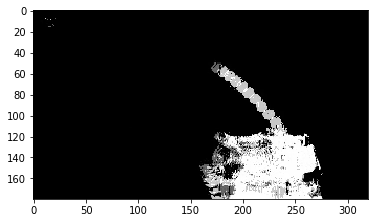

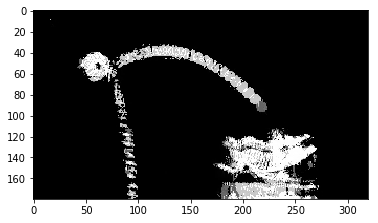

In [41]:
#@title Video shot labeler { run: "auto" }
next_frame = True #@param {type:"boolean"}
step = 67 #@param {type:"slider", min:1, max:100, step:1}
is_a_shot = False #@param {type:"boolean"}

x = 184 #@param {type:"slider", min:1, max:320, step:1}
y = 108 #@param {type:"slider", min:1, max:180, step:1}

if next_frame!=flip_flop:
  print('new frame')
  if is_a_shot:
    for i in range(step):
      target_x.append(x) 
      target_y.append(y)
  else:
    for i in range(step):
      target_x.append(None) 
      target_y.append(None)
  print('saved frame')
  
  flip_flop = next_frame  
  current_frame += step
  
print('{}% done'.format(int((len(target_x) / len(data))*100)))

draw_frame(data[current_frame], x, y)

next_frame_index = current_frame + step

if next_frame_index >= len(data):
  print('at last frame')
  next_frame_index = len(data)-1

draw_frame(data[next_frame_index], x, y)

In [0]:
len(target_x)

13238

In [0]:
len(data)

13225

In [0]:
from sklearn.externals import joblib

In [0]:
joblib.dump({'x':target_x,'y':target_y}, 'y.joblib')

['y.joblib']

In [0]:
# save to google cloud storage
# !gsutil cp y.joblib gs://rugby-videos/y.joblib

Copying file://y.joblib [Content-Type=application/octet-stream]...
/ [1 files][ 28.4 KiB/ 28.4 KiB]                                                
Operation completed over 1 objects/28.4 KiB.                                     
